In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [ ]:
# DATA loading

In [18]:
#data = load_boston()
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['MedHouseVal'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
## DATA exploration

In [20]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [22]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

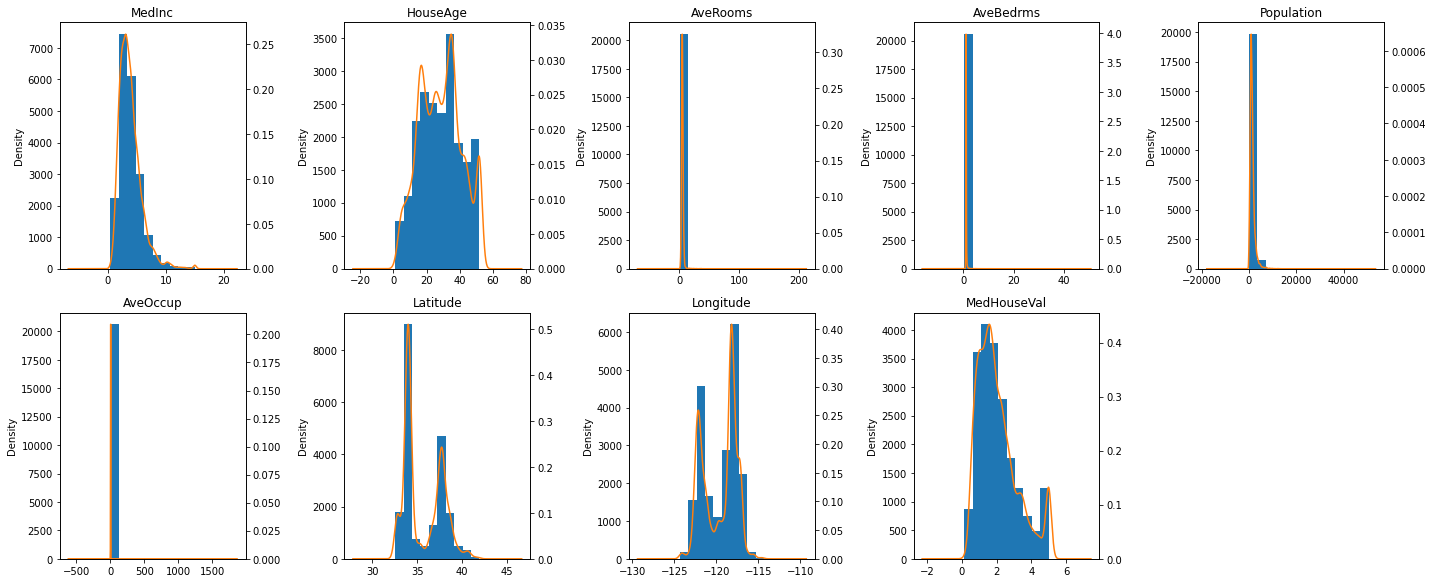

In [36]:
plt.figure(figsize = (20, 12))

for i, col in enumerate(df.columns):
    ax = plt.subplot(3, 5, i+1)
    df[col].hist(bins=10)
    ax2 = df[col].plot.kde(ax=ax, secondary_y=True, title=col, fontsize=15)
    ax2.set_ylim(0)    
    
plt.tight_layout()
plt.show()

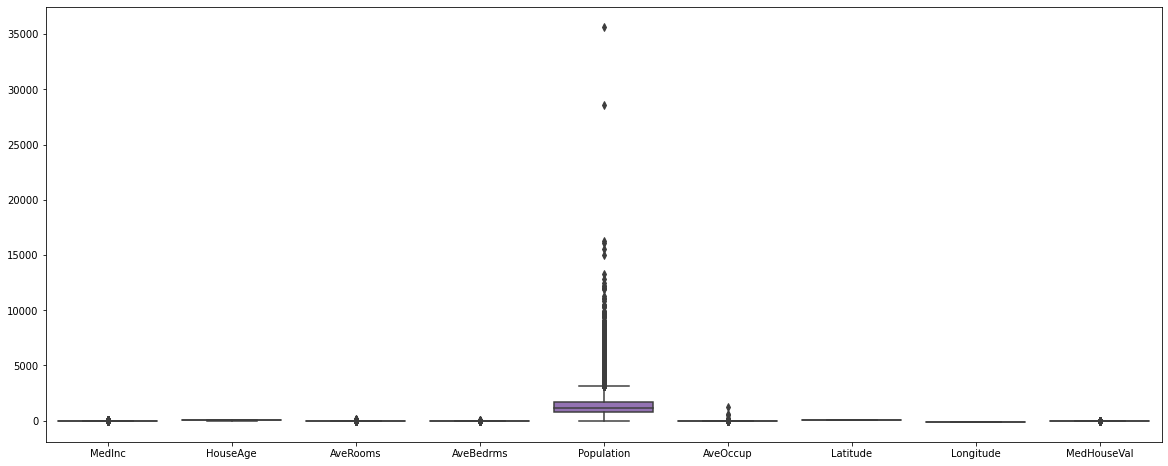

In [37]:
# We can clearly see there are outliers, let' look at the columns more closely

plt.figure(figsize=(20, 8))
sns.boxplot(data=df, width=0.8)
plt.show()

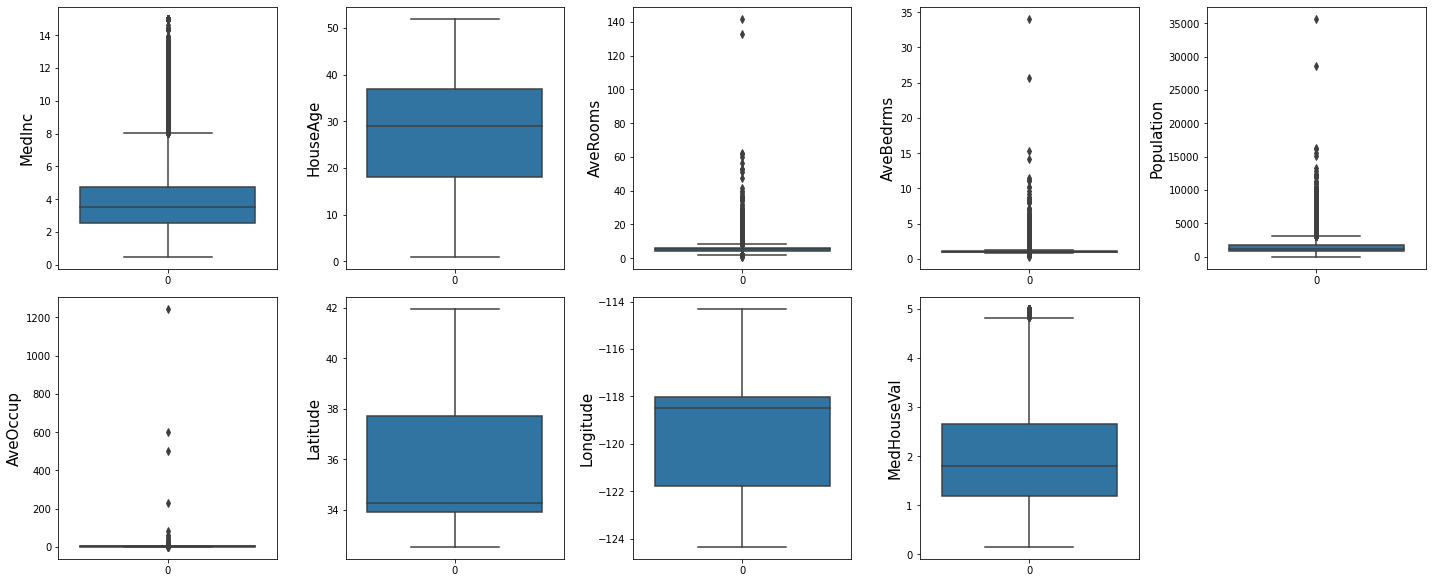

In [46]:
plt.figure(figsize=(20, 12))

for i, col in enumerate(df.columns):
    ax = plt.subplot(3, 5, i+1)
    sns.boxplot(data=df[col], width=0.8)
    plt.ylabel(col, fontsize = 15)

plt.tight_layout()
plt.show()

# DATA PREPROCESSING

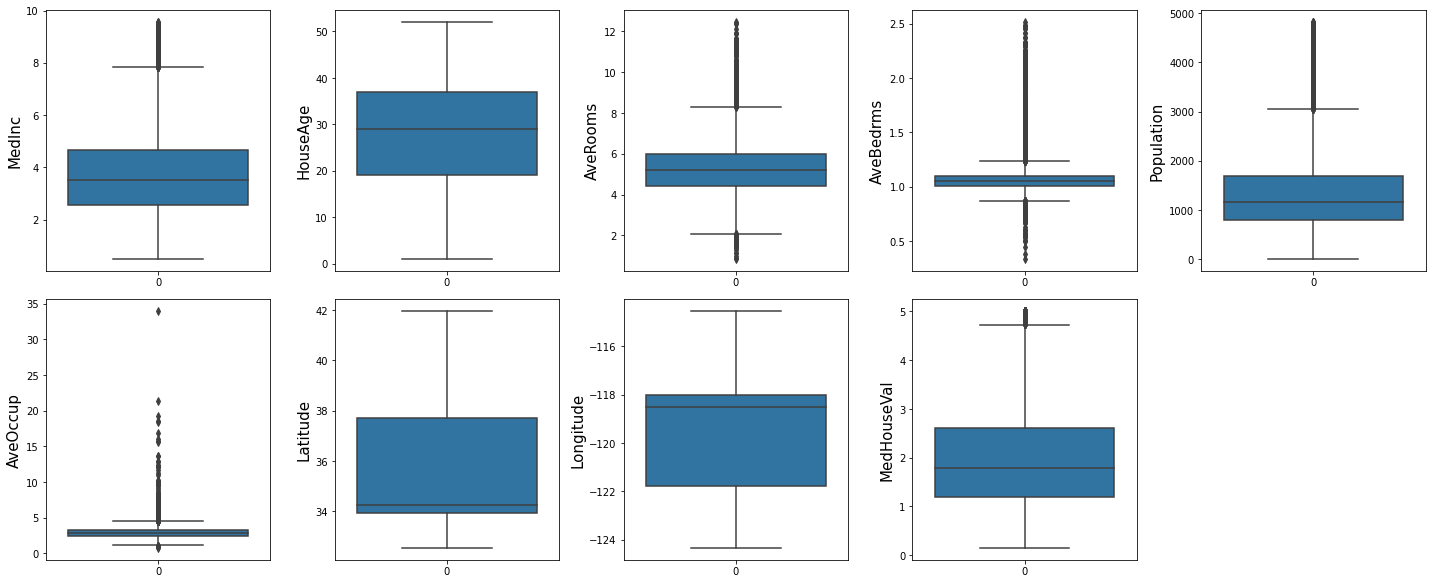

In [68]:
from scipy import stats

df_noOutliers = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

plt.figure(figsize = (20, 12))

for i, col in enumerate(df_noOutliers.columns):
    ax = plt.subplot(3, 5, i+1)
    sns.boxplot(data=df_noOutliers[col], width=0.8)
    plt.ylabel(col, fontsize = 15)

plt.tight_layout()
plt.show()

In [69]:
X = df_noOutliers.drop(columns='MedHouseVal', axis=1)
y = df_noOutliers['MedHouseVal']

In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
# let's check for multicolinearity
# https://en.wikipedia.org/wiki/Variance_inflation_factor

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

vif

,VIF,Features
0,2.990474,MedInc
1,1.270979,HouseAge
2,3.056863,AveRooms
3,1.591502,AveBedrms
4,1.178148,Population
5,1.086610,AveOccup
6,10.227110,Latitude
7,9.688154,Longitude


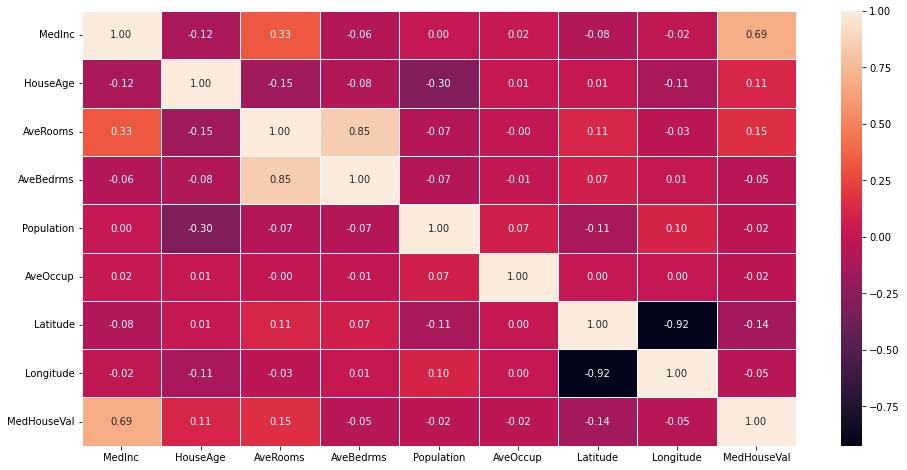

In [73]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, fmt='1.2f', annot_kws ={'size':10}, linewidth=1)
plt.show()

In [75]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='MedHouseVal ~ AveBedrms', data=df_noOutliers).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     165.0
Date:                Wed, 18 May 2022   Prob (F-statistic):           1.32e-37
Time:                        15:40:12   Log-Likelihood:                -30026.
No. Observations:               19794   AIC:                         6.006e+04
Df Residuals:                   19792   BIC:                         6.007e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8211      0.062     45.203      0.000       2.699       2.943
AveBedrms     -0.7439      0.058    -12.844      0.000      -0.857      -0.630
==============================================================================
Omnibus:                     2462.653   Durbin-Watson:                   0.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3476.188
Skew:                           0.996   Prob(JB):                         0.00
Kurtosis:                       3.501   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
lm = smf.ols(formula='MedHouseVal ~ AveRooms', data=df_noOutliers).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1381.
Date:                Wed, 18 May 2022   Prob (F-statistic):          2.59e-292
Time:                        15:40:23   Log-Likelihood:                -29441.
No. Observations:               19794   AIC:                         5.889e+04
Df Residuals:                   19792   BIC:                         5.890e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8116      0.034     24.193      0.000       0.746       0.877
AveRooms       0.2316      0.006     37.165      0.000       0.219       0.244
==============================================================================
Omnibus:                     2062.626   Durbin-Watson:                   0.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2764.673
Skew:                           0.880   Prob(JB):                         0.00
Kurtosis:                       3.503   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
lm = smf.ols(formula='MedHouseVal ~ Latitude', data=df_noOutliers).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     423.8
Date:                Wed, 18 May 2022   Prob (F-statistic):           3.49e-93
Time:                        15:40:28   Log-Likelihood:                -29899.
No. Observations:               19794   AIC:                         5.980e+04
Df Residuals:                   19792   BIC:                         5.982e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6998      0.130     36.117      0.000       4.445       4.955
Latitude      -0.0750      0.004    -20.586      0.000      -0.082      -0.068
==============================================================================
Omnibus:                     2504.659   Durbin-Watson:                   0.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3555.182
Skew:                           1.010   Prob(JB):                         0.00
Kurtosis:                       3.481   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
lm = smf.ols(formula='MedHouseVal ~ Longitude', data=df_noOutliers).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     42.01
Date:                Wed, 18 May 2022   Prob (F-statistic):           9.29e-11
Time:                        15:40:47   Log-Likelihood:                -30087.
No. Observations:               19794   AIC:                         6.018e+04
Df Residuals:                   19792   BIC:                         6.019e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0161      0.469     -2.165      0.030      -1.936      -0.096
Longitude     -0.0254      0.004     -6.482      0.000      -0.033      -0.018
==============================================================================
Omnibus:                     2307.137   Durbin-Watson:                   0.324
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3190.798
Skew:                           0.960   Prob(JB):                         0.00
Kurtosis:                       3.428   Cond. No.                     7.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
# From the results above, we can assume that we should drop column AveBedrms and Longitude

In [82]:
df_noOutliers = df_noOutliers.drop(columns=['AveBedrms', 'Longitude'], axis=1)

## Transforming the data

Here we have to be extra carefull, as you will learn in next lesson, correct way to do crossvalidation and modeling is to train the model on the train set and than test the model on the data - testset, that the model had never seen. That means, that we can not scale the whole dataset, becouse the information about the train set could leak into the testset. The best way how to avoid this problem is to use sklearn's Pipelines.

In [182]:
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

pipe_kr = make_pipeline(StandardScaler(), KernelRidge())
pipe_lr = make_pipeline(StandardScaler(), LinearRegression())
pipe_knn =  make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=3))
pipe_rf =  make_pipeline(StandardScaler(), RandomForestRegressor())

In [195]:
from sklearn.model_selection import train_test_split, cross_validate

X = df_noOutliers.drop(columns='MedHouseVal', axis=1)
y = df_noOutliers['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

pipe_kr.fit(X_train, y_train)
pipe_lr.fit(X_train, y_train)
pipe_knn.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [199]:
# let's add model trained on the unscaled data
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

In [205]:
results_kr = mean_std_cross_val_scores(pipe_kr, X_train, y_train, return_train_score=True)
results_lr = mean_std_cross_val_scores(pipe_lr, X_train, y_train, return_train_score=True)
results_knn = mean_std_cross_val_scores(pipe_knn, X_train, y_train, return_train_score=True)
results_rf = mean_std_cross_val_scores(pipe_rf, X_train, y_train, return_train_score=True)
results_knn_unscaled = mean_std_cross_val_scores(knn, X_train, y_train, return_train_score=True)

In [206]:
results_all = pd.concat([results_kr, results_lr, results_knn, results_knn_unscaled, results_rf], axis=0)
results_all.index = ['kr', 'lr', 'knn', 'knn unscaled', 'rf']
results_all

,fit_time,score_time,test_score,train_score
kr,15.842 (+/- 1.871),0.060 (+/- 0.008),-2.827 (+/- 0.118),-2.818 (+/- 0.013)
lr,0.003 (+/- 0.004),0.004 (+/- 0.004),0.548 (+/- 0.025),0.551 (+/- 0.003)
knn,0.024 (+/- 0.004),0.032 (+/- 0.005),0.599 (+/- 0.022),0.802 (+/- 0.002)
knn unscaled,0.019 (+/- 0.003),0.007 (+/- 0.005),0.084 (+/- 0.027),0.404 (+/- 0.005)
rf,5.455 (+/- 0.163),0.046 (+/- 0.006),0.701 (+/- 0.019),0.958 (+/- 0.000)


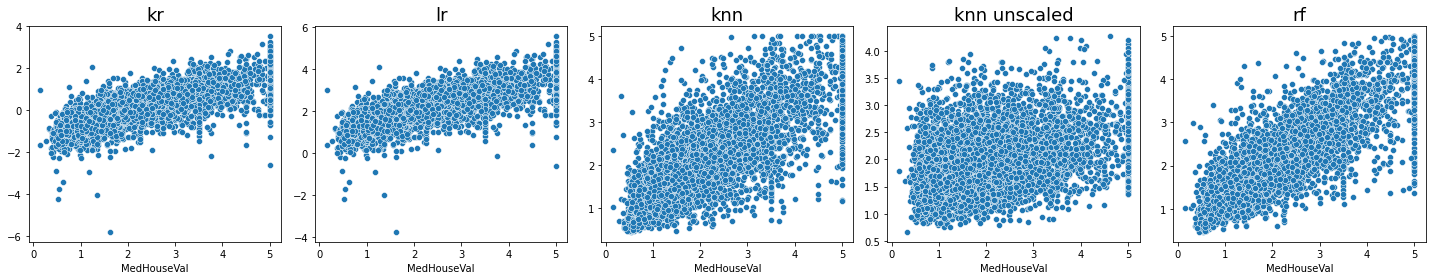

In [214]:
plt.figure(figsize=(20, 4))

models = [pipe_kr, pipe_lr, pipe_knn, knn, pipe_rf]
for i in range(len(results_all.index)):
    plt.subplot(1,5,i+1)
    preds = models[i].predict(X_test)
    sns.scatterplot(x=y_test, y=preds)
    plt.title(results_all.index[i], fontsize=18)

plt.tight_layout()  
plt.show()

In [170]:
## FUNCTIONS

In [194]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    all_scores = []
    scores = cross_validate(model, X_train, y_train, cv=10, **kwargs)
    df_scores = pd.DataFrame(scores)
    
    for col in (df_scores.columns):
        all_scores.append((f"%0.3f (+/- %0.3f)" % (np.mean(df_scores[col]), np.std(df_scores[col]))))

    return pd.DataFrame(data=np.array(all_scores), index=df_scores.columns).T